# Problem
Predicting the sales price of bulldozers in the future given sales and model data of previously sold bulldozers.

[Blue Book for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview)

# Data


*   Train.csv is the training set, which contains data through the end of 2011.
*   Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
*   Test.csv contains data from May 1, 2012 - November 2012.
* ValidSolution.csv contains SalePrice for Valid.csv
* There is no "solution" for the test set.







# Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Train.csv", low_memory=False)
valid_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Valid.csv", low_memory=False)
valid_sol_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/ValidSolution.csv", low_memory=False)
test_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Test.csv", low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)
print("What the data looks like: ")
train_csv.head()

What the data looks like: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Statistics for numeric data in the training set: ")
train_csv.describe()

Statistics for numeric data in the training set: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [ ]:
print("Count of non numeric data in the training set")
non_numeric_columns = train_csv.select_dtypes(exclude='number')
print(non_numeric_columns.shape[1])

print("Number of null values in the training set")
null_counts = train_csv.isnull().sum()
null_counts

Count of non numeric data in the training set
45
Number of null values in the training set


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

It is pretty self evident that the training data needs expansive normalization. Null values need to be dealt with, categorical labels need to be encoded and errors like a machine being made in the year 401125 (shown in the train data stats table) need to be corrected.

# Data Preprocessing

## Filling in numeric missing values

In [ ]:
print("Numeric columns that contain null values: ")
numeric_columns = train_csv.select_dtypes(include='number').columns
for col in numeric_columns:
  if train_csv[col].isnull().any():
    print(col)

Numeric columns that contain null values: 
auctioneerID
MachineHoursCurrentMeter


One way to fill in missing values for ***auctioneerID*** can be to use the mean of the data, but in this case this does not make too much sense to me as the mean is not an actual auctioneerID (6.55) as can be seen in the numeric data statistics table. What makes more sense to me is to use the most commonly occuring auctioneerID for the sale year in which the machine was sold. This allows for temporal consistency and can allow us to follow yearly trends if any that exist in auctioneer activity.

Most Common auctioneerID for Each Sale Year:
saleYear  auctioneerID
1989      1.0              2576
1990      1.0              2186
1991      1.0              3327
1992      1.0              2544
1993      1.0              2685
1994      1.0              2445
1995      1.0              2620
1996      1.0              3163
1997      1.0              2978
1998      1.0              3697
1999      1.0              4172
2000      1.0              6904
2001      1.0              7984
2002      1.0              8122
2003      1.0              6643
2004      1.0              9526
2005      1.0              9333
2006      1.0              9949
2007      1.0             14142
2008      1.0             19638
2009      1.0             21762
2010      1.0             18036
2011      1.0             20878
dtype: int64


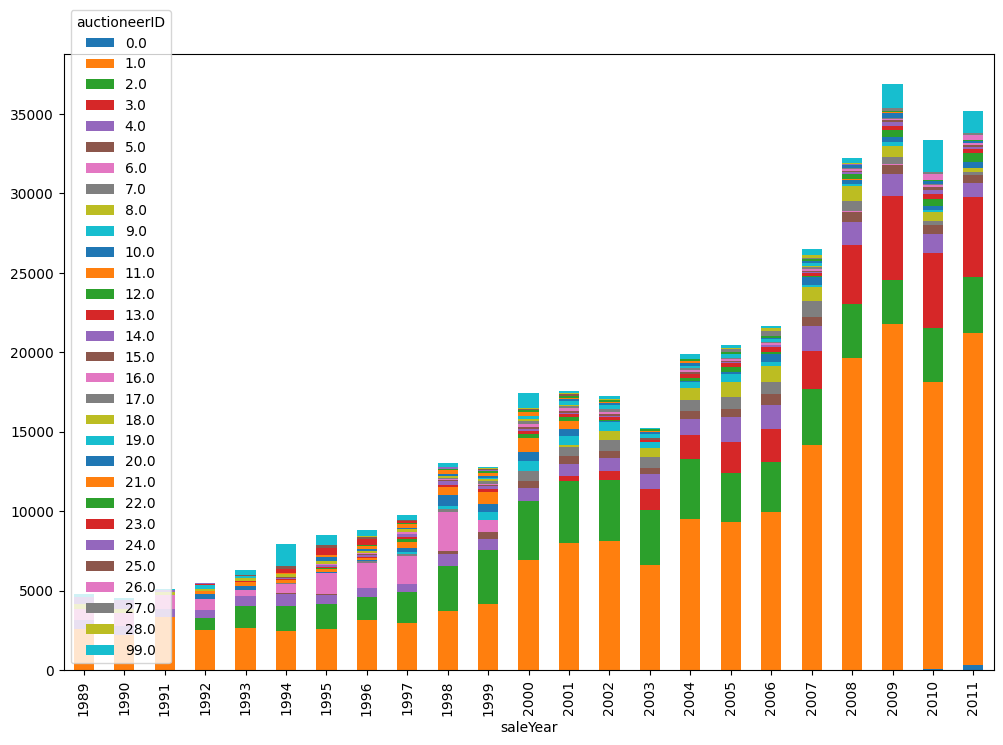

In [ ]:
# get date and extract year
train_csv['saledate'] = pd.to_datetime(train_csv['saledate'])
train_csv['saleYear'] = train_csv['saledate'].dt.year

# group auctioneer occurences by year and plot
grouped_data = train_csv.groupby(['saleYear', 'auctioneerID']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
most_common_auctioneerID = train_csv.groupby(['saleYear', 'auctioneerID']).size()
idx = most_common_auctioneerID.groupby('saleYear').idxmax()
result = most_common_auctioneerID.loc[idx]
print("Most Common auctioneerID for Each Sale Year:")
print(result)

The next numeric value to be dealt with is ***MachineHoursCurrentMeter***. Since this can essentially be any value greater than equal to 0 it would make more sense to deal with fill missing values using the mean or median.

Plotting MachineHoursCurrentMeter data distribution: 


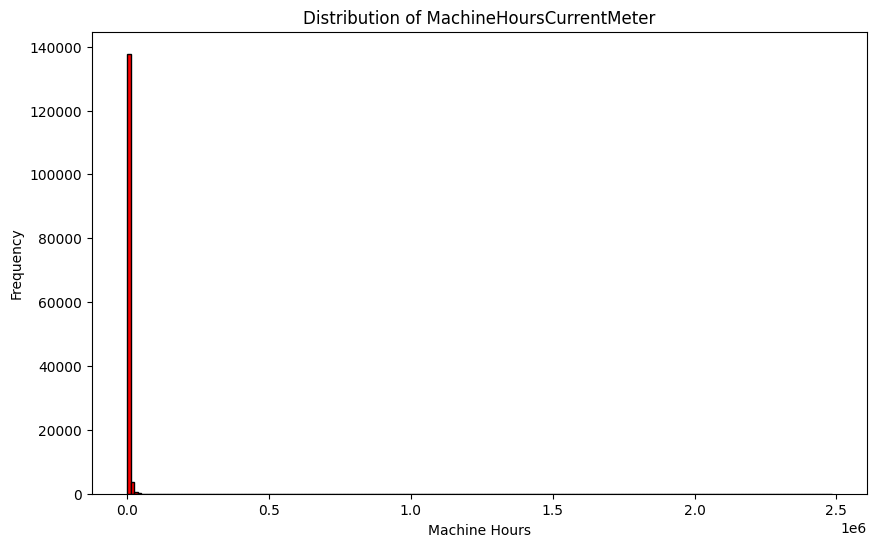

In [ ]:
print("Plotting MachineHoursCurrentMeter data distribution: ")
plt.figure(figsize=(10, 6))
train_csv["MachineHoursCurrentMeter"].plot.hist(bins=200, color="red", edgecolor="black")
plt.title("Distribution of MachineHoursCurrentMeter")
plt.xlabel("Machine Hours")
plt.ylabel("Frequency")
plt.show()


The data seems to not be a very good normal distribution. Using the mean (3.457955e+03) to impute data may not be a very good idea since it would skew the data quite bit. Thee plot shows that 0 occurs very frequently, and since it is also the median, imputing using the median for ***MachineHoursCurrentMeter*** could be a viable strategy.

## Data Errors

One glaring error that can be identified within the data is that the minimum of YearMade is 1000. This of course shouldn't be possible and needs to be rectified.

YearMade Distribution


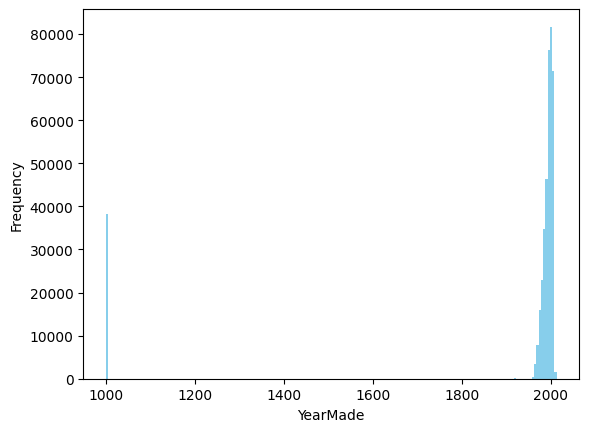

In [ ]:
print("YearMade Distribution")
train_csv["YearMade"].plot.hist(bins=200, color="skyblue")
plt.xlabel('YearMade')
plt.show()

The ***YearMade*** 1000 values are very clearly outliers. The rest of the distribution is normal and hence the erronoues values can be replaced by the median.

## Correctly using ***saledate***

The saledate data is in the form mm/dd/yyy. This is not very useful as it is and can be seperated into month, day and year. This conversion also allows for easier input into a machine learning model.

In [ ]:
train_csv["saleMonth"] = train_csv["saledate"].dt.month
train_csv["saleDay"] = train_csv["saledate"].dt.day
print(train_csv["saleMonth"].head())
print(train_csv["saleDay"].head())

0    11
1     3
2     2
3     5
4     7
Name: saleMonth, dtype: int64
0    16
1    26
2    26
3    19
4    23
Name: saleDay, dtype: int64


## Non Numeric Data Conversion and Filling

A large part of the dataset is non numeric or categoric. This needs to be encoded properly and missing values need to be dealt with.

- Ordinal vs Nominal categorical data:
Ordinal data is data that can have an order or ranking. When encoding ranking must be preserved. In the bulldozer dataset there are two columns that can considered ordinal, UsageBand and ProductSize. I will utilize label encoding to encode these columns.
The rest of the categorical columns are nominal in nature. One hot encoding can be utilized here but due to the large number of unique categories in these columns one hot encodings blows up the size of the input features to ~5700 columns which crashes the runtime. Instead of one hot encoding we can utilize target encoding. Target encoding is presented as an alternative to one hot coding and does not suffer from the same increase in dimensionality albeit there is an increased risk of overfitting. Sources: [Why you should try Mean Encoding](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0 ), [Target Encoding Vs. One-hot Encoding](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)
- In regards to dealing with missing categorical values, I will use random selection imputation for ordinal data owing to the acceptable results shown by this paper: [Missing Data Imputation for Ordinal Data
](https://www.ijcaonline.org/archives/volume181/number5/quintero-2018-ijca-917522.pdf) and I will use most frequent value imputation for nominal data owing to broad online consensus in regards to its effectiveness.
- I have also decided to drop the following columns: "fiBaseModel", "fiSecondaryDesc", "fiModelSeries", "fiModelDescriptor". These are all columns that combine to make up "fiModelDesc" and hence in my opinion "fiModelDesc" is enough to account for model description as a feature.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

def preprocess(data, test, val, label_encoder, target_encoder):
  # extract date data
  data['saledate'] = pd.to_datetime(data['saledate'])
  data['saleYear'] = data['saledate'].dt.year
  data['saleMonth'] = data['saledate'].dt.month
  data['saleDay'] = data['saledate'].dt.day
  data = data.drop("saledate", axis = 1)

  # fill in auctioneerID
  most_common_auctioneerID = data.groupby(['saleYear', 'auctioneerID']).size()
  idx = most_common_auctioneerID.groupby('saleYear').idxmax()
  result = most_common_auctioneerID.loc[idx]
  result = result.to_dict()
  result_dict = {int(year): id for (year, id), auctioneerID in result.items()}
  for index, row in data.iterrows():
    if pd.isna(row["auctioneerID"]):
      data.loc[index, 'auctioneerID'] = result_dict[row["saleYear"]]

  # fill in MachineHoursCurrentMeter
  machine_hrs_median = data['MachineHoursCurrentMeter'].median()
  data['MachineHoursCurrentMeter'].fillna(machine_hrs_median, inplace=True)

  # fix YearMade error
  yearmade_median = data['YearMade'].median()
  data['YearMade'].replace(1000, yearmade_median, inplace=True)

  # Fill missing ordinal categorical values by random selection
  non_missing_usageband = data['UsageBand'].dropna().unique()
  data['UsageBand'] = data['UsageBand'].apply(lambda x: np.random.choice(non_missing_usageband) if pd.isna(x) else x)
  non_missing_prodsize = data['ProductSize'].dropna().unique()
  data['ProductSize'] = data['ProductSize'].apply(lambda x: np.random.choice(non_missing_prodsize) if pd.isna(x) else x)

  # Label encode ordinal values
  data['UsageBand'] = label_encoder.fit_transform(data['UsageBand'])
  data['ProductSize'] = label_encoder.fit_transform(data['ProductSize'])

  # drop redundant columns
  data = data.drop(["fiBaseModel", "fiSecondaryDesc", "fiModelSeries", "fiModelDescriptor"], axis = 1)

  if not test:
    target_col = "SalePrice"
    y = data[target_col]

  categorical_nom_cols = []

  for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content) and (label != "UsageBand" and label != "ProductSize"):
      # fill categorical data that is nominal with most frequent value imputation
      most_frequent_value = data[label].mode()[0]
      data[label] = data[label].fillna(most_frequent_value)
      categorical_nom_cols.append(label)

  # target encoding
  if not (test or val) :
    # fit to non test data
    data[categorical_nom_cols] = target_encoder.fit_transform(data[categorical_nom_cols], y)
  else:
    # on non train apply transformation only
    data[categorical_nom_cols] = target_encoder.transform(data[categorical_nom_cols])

  feature_col_names = list(data.columns)
  if not test:
    feature_col_names.remove("SalePrice")

  X = data[feature_col_names].copy()
  # scale features
  scaler = MinMaxScaler()
  X.loc[:, feature_col_names] = scaler.fit_transform(X.loc[:, feature_col_names])
  if not test:
    return X, y
  else:
    return X

label_encoder = LabelEncoder()
target_encoder = ce.TargetEncoder()
X_train, y_train = preprocess(train_csv, False, False, label_encoder, target_encoder)
# SalesPrice is missing from valid_csv and has to be added from ValidSolution
valid_csv['SalePrice'] = valid_sol_csv['SalePrice']
X_val, y_val = preprocess(valid_csv, False, True, label_encoder, target_encoder)
X_test = preprocess(test_csv, True, False, label_encoder, target_encoder)


In [ ]:
print("Null values in train: ")
print(X_train.isnull().sum())
print("Null values in validation: ")
print(X_val.isnull().sum())
print("Null values in test: ")
print(X_test.isnull().sum())

Null values in train: 
SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier                   0
Tip_Control                 0
Tire_Size                   0
Coupler          

# Regression


## Simple Linear Regression

Simple Linear Regression simply fits a regression line to the data, it does not deal with potential overfitting, it does not perform any inherent feature selection and it does not deal with multicolinear data, however it is the most easily interpretable and usable and hence will serve as essentially the baseline for comparison with other regression techniques.

I will be using the r2 score (coefficient of determination) as an evaluation metric  [[Top Evaluation Metrics for Regression](https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/)].
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case, a constant model that always predicts the average y disregarding the input features would get a score of 0.0. I will also use the the mean absolute error as another evaluation metric as it gives equal weight to all errors and is less sensitive to outliers. Both metrics can also be used for comparison between regression techniques.

### Training and Evaluation

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
## Linear Regression using default parameters
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predicted_vals = lin_reg.predict(X_val)
r2_lin = r2_score(y_val, predicted_vals)
mae_lin = mean_absolute_error(y_val, predicted_vals)
print("R2 Score:", r2_lin)
print("MAE:", mae_lin)

R2 Score: 0.18446220170512972
MAE: 21542.86332711631


## Ridge Regression

Ridge Regression is a linear regression technique that extends ordinary least squares regression by introducing a regularization term to the objective function. The primary purpose of Ridge Regression is to address the issue of multicollinearity in the feature variables and to prevent overfitting, especially when the number of features is large relative to the number of observations. It shrinks features coeffecients towards zero but does not allow them to become exactly zero, hence it can be useful for us since it is possible that some features in our dataset might be more important than others and the less important features might still have a little bit of predictive power.

I will be going over a range of alphas [0.1 - 1000] in order to find the optimal alpha. Alpha is a constant that multiplies the L2 term, controlling regularization strength.

### Training and Evaluation

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 100)
coeffs = []
# Finding best alpha
for alpha in alphas:
  ridge = Ridge(alpha)
  ridge.fit(X_train, y_train)
  predicted_val = ridge.predict(X_val)
  r2_vals.append(r2_score(y_val, predicted_val))
  mae_vals.append(mean_absolute_error(y_val, predicted_val))
  coeffs.append(ridge.coef_)

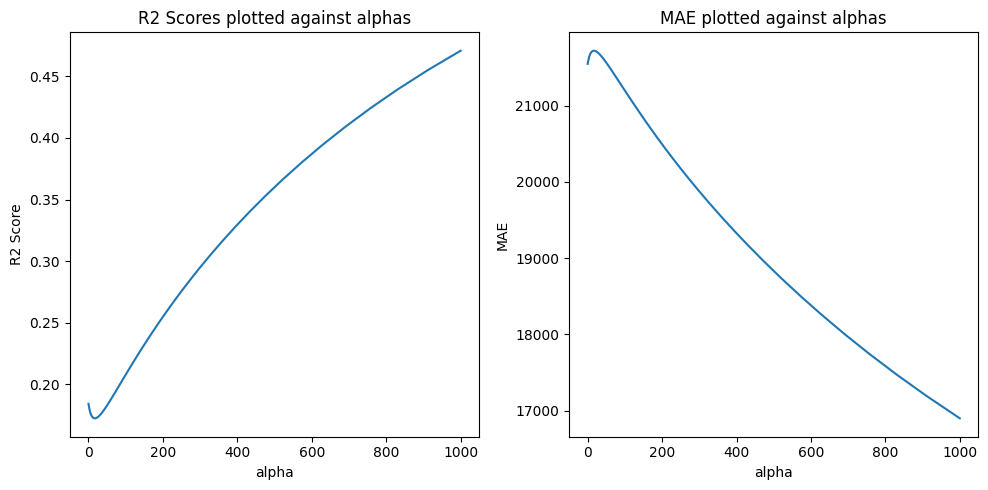

Best alpha:  1000.0
Best r2: 0.470795242963468
Best mae: 16898.58831242509


In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_vals, label='R2 Scores')
plt.xlabel("alpha")
plt.ylabel("R2 Score")
plt.title("R2 Scores plotted against alphas")

plt.subplot(1, 2, 2)
plt.plot(alphas, mae_vals, label='MAE')
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("MAE plotted against alphas")

plt.tight_layout()
plt.show()
r2_best_ridge= max(r2_vals)
r2_best_index = r2_vals.index(r2_best_ridge)
mae_best_ridge = min(mae_vals)
mae__best_index = mae_vals.index(mae_best_ridge)
alpha_best = alphas[r2_best_index]
print("Best alpha: ", alpha_best)
print("Best r2:", r2_best_ridge)
print("Best mae:", mae_best_ridge)

### Feature Importance Chart

Feature importance chart


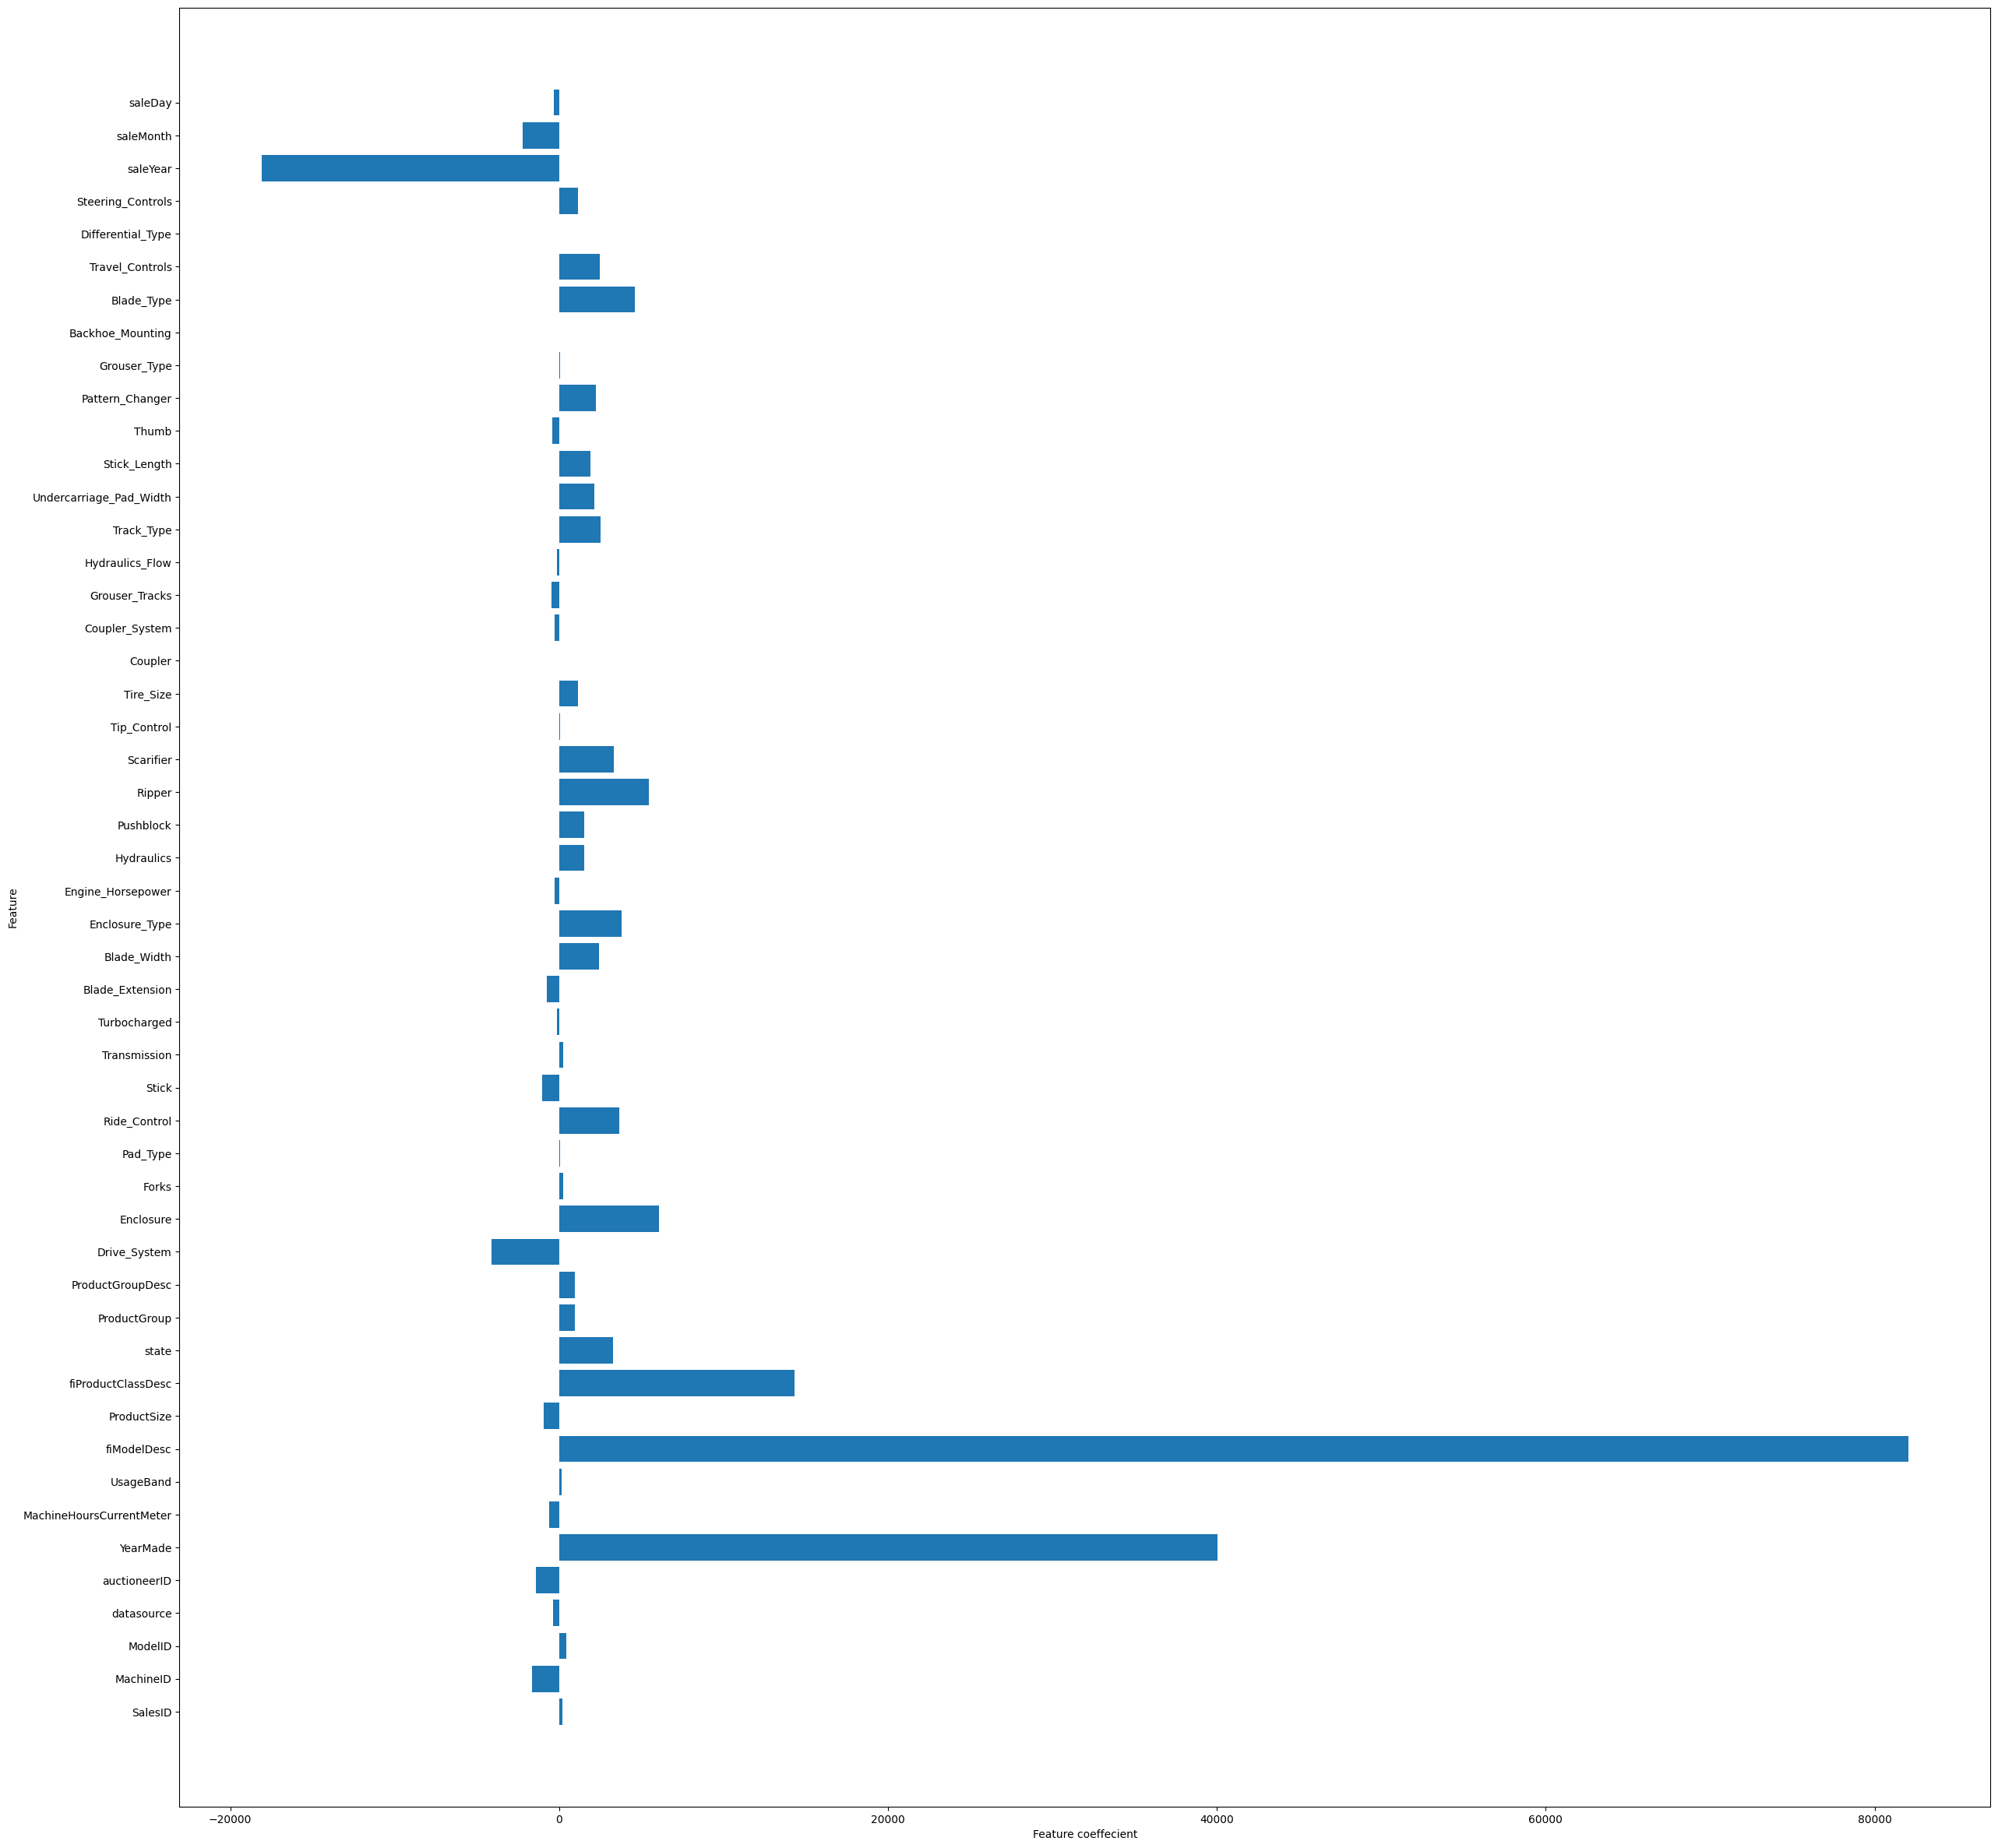

In [31]:
feature_names = X_val.columns
best_coeffs = coeffs[r2_best_index]
plt.figure(figsize=(30,30))
plt.barh(feature_names, best_coeffs)
plt.xlabel("Feature coeffecient")
plt.ylabel("Feature")
print("Feature importance chart")

Owing to the large number of features, it is difficult to exactly determine why the coeffecients for different features are what they are in the chart. It might be smart to do some feature reduction/selection.

## Lasso Regression

Lasso Regression has an inherent feature selection property. It tends to shrink the coefficients of less important features to exactly zero. This makes Lasso useful when dealing with datasets with a large number of features, helping to identify and remove irrelevant features. Since our dataset has many features Lasso might be a good idea. Lasso regression also allows for coeffecients to shrink to zero thus allowing for extreme feature selection. I will be going over a range of alphas [0.1 - 1000] in order to find the optimal alpha. Alpha is a constant that multiplies the L1 term, controlling regularization strength.

### Training and Evaluation

In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 100)
coeffs = []
# Finding best alpha
for alpha in alphas:
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)
  predicted_val = lasso.predict(X_val)
  r2_vals.append(r2_score(y_val, predicted_val))
  mae_vals.append(mean_absolute_error(y_val, predicted_val))
  coeffs.append(lasso.coef_)

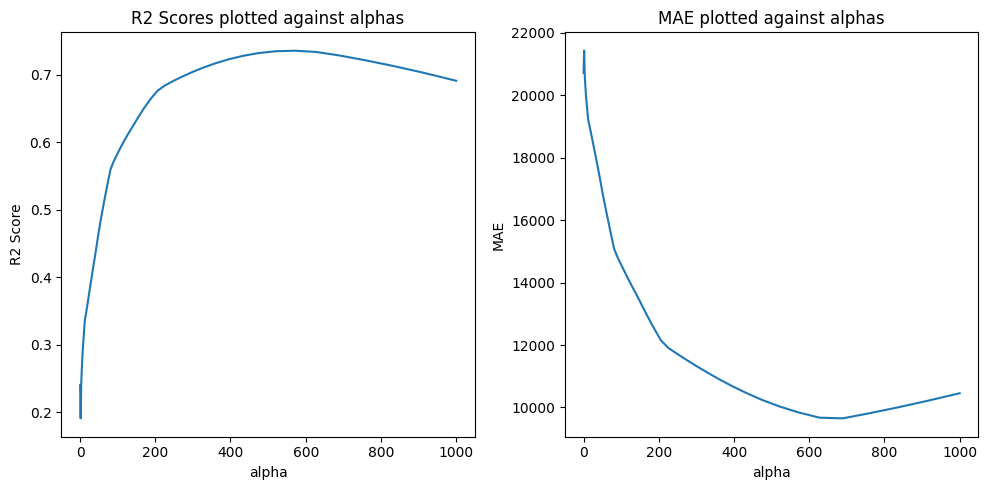

Best alpha:  572.236765935022
Best r2: 0.7353817809940998
Best mae: 9652.930212338839


In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_vals, label='R2 Scores')
plt.xlabel("alpha")
plt.ylabel("R2 Score")
plt.title("R2 Scores plotted against alphas")

plt.subplot(1, 2, 2)
plt.plot(alphas, mae_vals, label='MAE')
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("MAE plotted against alphas")

plt.tight_layout()
plt.show()
r2_best_lasso = max(r2_vals)
r2_best_index = r2_vals.index(r2_best_lasso)
mae_best_lasso = min(mae_vals)
mae__best_index = mae_vals.index(mae_best_lasso)
alpha_best_lasso = alphas[r2_best_index]
print("Best alpha: ", alpha_best_lasso)
print("Best r2:", r2_best_lasso)
print("Best mae:", mae_best_lasso)

### Feature Importance Chart

Feature importance chart


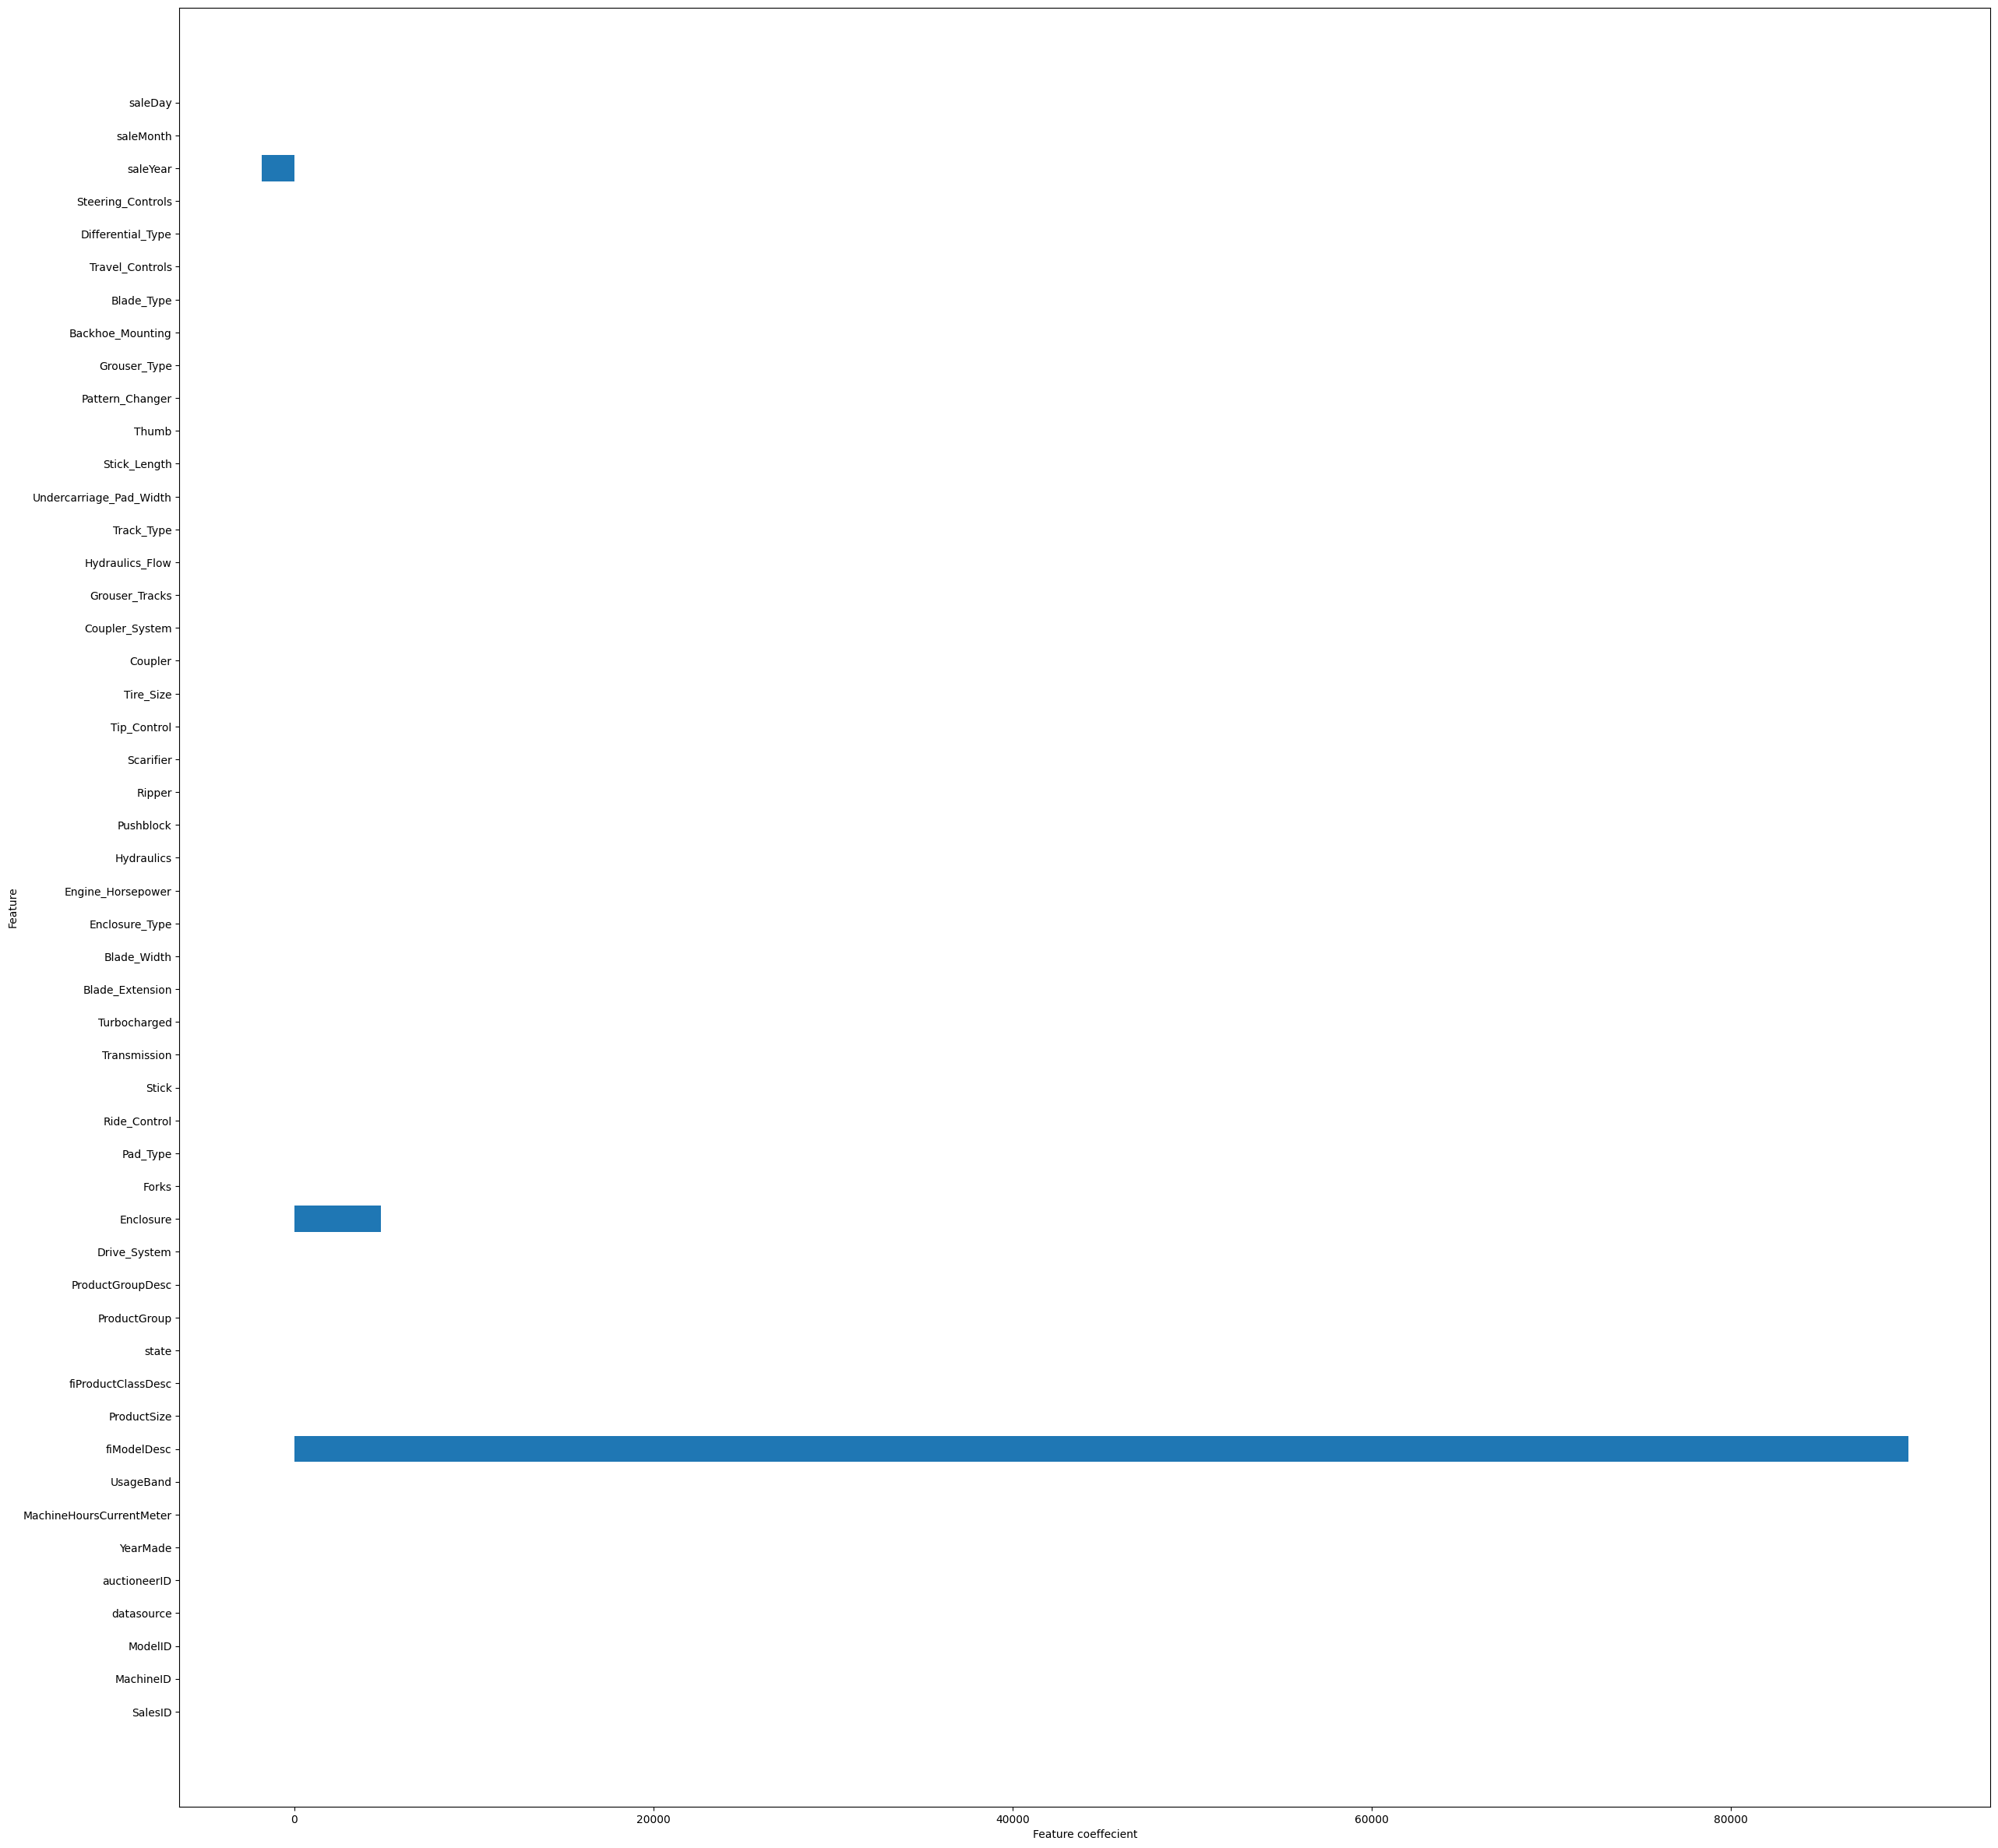

In [34]:
feature_names = X_val.columns
best_coeffs = coeffs[r2_best_index]
plt.figure(figsize=(30,30))
plt.barh(feature_names, best_coeffs)
plt.xlabel("Feature coeffecient")
plt.ylabel("Feature")
print("Feature importance chart")

From the feature importance chart, it seems that "fiModelDesc", "Enclosure" and "SaleYear" are given the most importance when the best alpha (572) is used. Higher feature regularization seems to improve model accuracy. I believe this can be attributed to:
* The aforementioned features are the best predictors and predictions are best when only they are selected
* Target encoding of some categorical resulting in potential overfitting and greater regularization results in reduced overfitting and hence better predictions.

## ElasticNet Regression

Elastic Net is a regularization technique that combines both Lasso (L1 regularization) and Ridge (L2 regularization) penalties in the linear regression objective function. The combination of L1 and L2 regularization allows Elastic Net to enjoy the benefits of both methods. L1 helps with sparse feature selection, while L2 helps with dealing with multicollinearity and stabilizing coefficients.

Similar to before, I will be finding the optimal hyperparameters, alpha (Constant that multiplies the penalty terms) and l1_ratio(The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2).

### Training and Evaluation

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 10)
l1s = values = np.linspace(0, 1, 10)
coeffs = []
# Finding best alpha and l1
for alpha in alphas:
  for l1 in l1s:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1)
    elasticnet.fit(X_train, y_train)
    predicted_val = elasticnet.predict(X_val)
    r2_vals.append(r2_score(y_val, predicted_val))
    mae_vals.append(mean_absolute_error(y_val, predicted_val))
    coeffs.append(elasticnet.coef_)

In [63]:
r2_best_en = max(r2_vals)
r2_best_index = r2_vals.index(r2_best_en)
mae_best_en = min(mae_vals)
mae_best_index = mae_vals.index(mae_best_en)
l1_best = l1s[round(r2_best_index/10)]
print(l1_best)
alpha_best = alphas[r2_best_index//10]
print("Best Alpha:", alpha_best)
print("Best l1_ratio:", l1_best)
print("Best r2:", r2_best_en)
print("Best MAE:", mae_best_en)
print("It is pretty self evident that Lasso/L1 regularization gives the best results!")

1.0
Best Alpha: 359.38136638046257
Best l1_ratio: 1.0
Best r2: 0.716665326943498
Best MAE: 10456.210269784828
It is pretty self evident that Lasso/L1 regularization gives the best results!


# Regression Comparison

In [73]:
data = {
    'Linear Regression Model': ['Simple', 'Ridge', 'Elastic Net', 'Lasso'],
    'R2': [r2_lin,r2_best_ridge, r2_best_en, r2_best_lasso, ],
    'MAE': [mae_lin, mae_best_ridge, mae_best_en, mae_best_lasso, ]
}

pd.DataFrame(data)

,Linear Regression Model,R2,MAE
0,Simple,0.184462,21542.863327
1,Ridge,0.470795,16898.588312
2,Elastic Net,0.716665,10456.210270
3,Lasso,0.735382,9652.930212


Lasso is pretty clearly the better linear regression for us. It appears that a few features like the model description of a bulldozer are very good predictors of it's sale price and most other features only seem to add noise and hence extensive feature selection seems to work well.

# Test Set Prediction Using Best Linear Regression Model

In [80]:
print("Final predictions on test data using best best model:")
lasso = Lasso(alpha_best_lasso)
lasso.fit(X_train, y_train)
predicted_vals = lasso.predict(X_test)
X_test_with_sales_price = pd.DataFrame(predicted_vals, columns=["SalePrice"])
X_test_with_sales_price = pd.concat([X_test_with_sales_price, test_csv], axis = 1)
X_test_with_sales_price


Final predictions on test data using best best model:


,SalePrice,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay
0,18941.654905,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,3
1,35687.599471,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,10
2,52363.536510,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,5,10
3,76145.055965,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,...,Yes,Triple,NaN,NaN,NaN,NaN,NaN,2012,5,10
4,34791.298558,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,33455.011198,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24
12453,13655.047343,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24
12454,14702.062875,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24
12455,14702.062875,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24
